#**Bedu - Curso: Tecnolochicas**

# Proyecto: **Análisis de crimenes reportados en Los Angeles, California en el periodo de 2010 a 2023**

### Equipo #9
####Integrantes:
* Alexa Valentina Sánchez Tamez
* Yamitzi Zempoalteca Zecua
* Maria Teresa Hernandez
* Maria Fernanda Uch Dzib

## Introducción
En Los Ángeles California se ha generado y experimentado  de parte de los habitantetes y autoridades un preocupante aumento en la incidencia de crímenes desde el año 2010 hasta el presente año, 2023. Este fenómeno plantea serias preocupaciones para la seguridad pública y la calidad de vida de los residentes.


## Sección 0: Importación de Librerías

En esta sección se importan las librerías necesarias para la limpieza del dataset y el desarrollo del proyecto.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

## Sección 1: Limpieza y Preparación de los Datos

El conjunto de datos contiene información recopilada de informes de delitos e incidentes denunciados en la ciudad de Los Ángeles, California, Estados Unidos. Los datos abarcan desde el año 2010 hasta el 2023 y fueron proporcionados por el departamento de policía de Los Ángeles.

Este conjunto de datos proporciona detalles sobre la hora y los lugares en los que se cometieron los crímenes, así como información sobre las víctimas y descripciones de los delitos.

La obtención de este conjunto de datos se realizó a través de la plataforma Kaggle, una de las más grandes en el ámbito de la Ciencia de Datos, que ofrece la posibilidad de encontrar y publicar diversos conjuntos de datos.



La fuente de los archivos proviene del sitio web de datos de la ciudad de Los Ángeles y el enlace de descarga a través de la plataforma Kaggle es la siguiente:

[Los Angeles Crime Data - 2010 to 2023
](https://www.kaggle.com/datasets/manjitbaishya001/la-crime-data-2010-to-2023/data)

In [ ]:
# Importar los datos (Datasets)
# Este primer dataset contiene toda la información respecto a los crímenes reportados.
crimenes_reportados = pd.read_csv("/content/drive/MyDrive/Proyecto/la_crime_2010_to_2023.csv", index_col=0)

#El segundo dataset, contiene el tipo de modus operandi correspondiente al código que aparece en dicha columna del primer dataset.

modus_operandi = pd.read_csv("/content/drive/MyDrive/Proyecto/mo_codes.csv", index_col=0)



In [ ]:
crimenes_reportados.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
DR_NO,,,,,,,,,,,,,,,,,,,,,
1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN
70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN
90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN
100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",0400,...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN


In [ ]:
modus_operandi.head()

,description
code,
100,Suspect Impersonate
101,Aid victim
102,Blind
103,Crippled
104,Customer


In [ ]:
#revisamos si hay valores NaN
crimenes_reportados.isna().sum()

Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA               857658
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            352115
Vict Age                0
Vict Sex           314958
Vict Descent       315011
Premis Cd              57
Premis Desc           717
Weapon Used Cd    1978414
Weapon Desc       1978415
Status                  3
Status Desc             0
Crm Cd 1               21
Crm Cd 2          2787544
Crm Cd 3          2987613
Crm Cd 4          2993263
LOCATION                0
Cross Street      2499025
LAT                     0
LON                     0
AREA              2135775
dtype: int64

In [ ]:
#Hay muchos NaNs, y debido a las categorias en las que se encuentran no se eliminaran, seran sustituidos por NA.
crimenes_reportados.fillna('NA', inplace = True)
crimenes_reportados.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
DR_NO,,,,,,,,,,,,,,,,,,,,,
1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,Adult Arrest,900.0,NA,NA,NA,300 E GAGE AV,NA,33.9825,-118.2695,NA
11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,Invest Cont,740.0,NA,NA,NA,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NA
70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,0344,...,Invest Cont,946.0,NA,NA,NA,1300 E 21ST ST,NA,34.0224,-118.2524,NA
90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,1100 0400 1402,...,Invest Cont,900.0,998.0,NA,NA,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NA
100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",0400,...,Invest Cont,122.0,NA,NA,NA,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NA


In [ ]:
#En el dataframe hay varias columnas que contienen códigos que pueden ser repetitivos porque también hay columnas que describen lo que ese código significa, por ejemplo, la columna de "AREA" y "AREA NAME",
#por lo que eliminaremos las columnas de los códigos y dejaremos solo las descriptivas.
crimenes_reportados = crimenes_reportados.drop(columns=['Date Rptd', 'Part 1-2', 'AREA', 'Weapon Used Cd', 'Crm Cd', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Premis Cd', 'Status'])
crimenes_reportados.head()

,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,LOCATION,Cross Street,LAT,LON
DR_NO,,,,,,,,,,,,,,,,,,
1307355,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,SINGLE FAMILY DWELLING,NA,Adult Arrest,900.0,300 E GAGE AV,NA,33.9825,-118.2695
11401303,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,STREET,NA,Invest Cont,740.0,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
70309629,08/09/2010 12:00:00 AM,1515,13.0,Newton,1324,OTHER MISCELLANEOUS CRIME,0344,0,M,H,ALLEY,NA,Invest Cont,946.0,1300 E 21ST ST,NA,34.0224,-118.2524
90631215,01/05/2010 12:00:00 AM,150,6.0,Hollywood,646,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,STREET,HAND GUN,Invest Cont,900.0,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
100100501,01/02/2010 12:00:00 AM,2100,1.0,Central,176,"RAPE, ATTEMPTED",0400,47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,122.0,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [ ]:
#renombramos las columnas para tener una mejor noción de lo que contienen
crimenes_reportados.columns = ['date occured', 'time', 'area code', 'area', 'district', 'description', 'mocodes', 'age',
              'sex', 'race', 'context', 'weapon', 'case status', 'ccd1', 'location',
              'street', 'latitude', 'longitud']

crimenes_reportados

,date occured,time,area code,area,district,description,mocodes,age,sex,race,context,weapon,case status,ccd1,location,street,latitude,longitud
DR_NO,,,,,,,,,,,,,,,,,,
1307355,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,SINGLE FAMILY DWELLING,NA,Adult Arrest,900.0,300 E GAGE AV,NA,33.9825,-118.2695
11401303,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,STREET,NA,Invest Cont,740.0,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
70309629,08/09/2010 12:00:00 AM,1515,13.0,Newton,1324,OTHER MISCELLANEOUS CRIME,0344,0,M,H,ALLEY,NA,Invest Cont,946.0,1300 E 21ST ST,NA,34.0224,-118.2524
90631215,01/05/2010 12:00:00 AM,150,6.0,Hollywood,646,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,STREET,HAND GUN,Invest Cont,900.0,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
100100501,01/02/2010 12:00:00 AM,2100,1.0,Central,176,"RAPE, ATTEMPTED",0400,47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,122.0,8TH ST,SAN PEDRO ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231606525,03/22/2023 12:00:00 AM,1000,NA,Foothill,1602,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,25,F,H,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,230.0,12800 FILMORE ST,NA,34.2790,-118.4116
231210064,04/12/2023 12:00:00 AM,1630,NA,77th Street,1239,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,29,M,B,LAUNDROMAT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,230.0,6100 S VERMONT AV,NA,33.9841,-118.2915
230115220,07/01/2023 12:00:00 AM,1,NA,Central,154,PICKPOCKET,1822 0344,24,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),NA,Invest Cont,352.0,500 S MAIN ST,NA,34.0467,-118.2485


In [ ]:
#Como queremos hacer comparativas por año, dejamos la columna "occured" tipo "object" para poder manipularlo de mejor manera.
#Aquí separamos la fecha de la hora, ya que la hora parece ser siempre la misma.
crimenes_reportados['date occured'].str.split('\s')

DR_NO
1307355      [02/20/2010, 12:00:00, AM]
11401303     [09/12/2010, 12:00:00, AM]
70309629     [08/09/2010, 12:00:00, AM]
90631215     [01/05/2010, 12:00:00, AM]
100100501    [01/02/2010, 12:00:00, AM]
                        ...            
231606525    [03/22/2023, 12:00:00, AM]
231210064    [04/12/2023, 12:00:00, AM]
230115220    [07/01/2023, 12:00:00, AM]
230906458    [03/05/2023, 12:00:00, AM]
230319786    [11/09/2023, 12:00:00, AM]
Name: date occured, Length: 2993433, dtype: object

In [ ]:
#asignamos los datos separados a una nueva variable
fecha_ocurrida = crimenes_reportados['date occured'].str.split('\s', expand=True)
fecha_ocurrida.head()

,0,1,2
DR_NO,,,
1307355,02/20/2010,12:00:00,AM
11401303,09/12/2010,12:00:00,AM
70309629,08/09/2010,12:00:00,AM
90631215,01/05/2010,12:00:00,AM
100100501,01/02/2010,12:00:00,AM


In [ ]:
#Les asigne un nombre a las columnas para facilitar al momento de llamarlas
fecha_ocurrida.columns = ['fecha', 'hora', 'AM']

In [ ]:
#Aquí solo reemplaze los datos de la columna "occured" de mi df original, con la columna "fecha".
crimenes_reportados['date occured']  = fecha_ocurrida['fecha'].str.split('\s', expand=True)
crimenes_reportados.head()

,date occured,time,area code,area,district,description,mocodes,age,sex,race,context,weapon,case status,ccd1,location,street,latitude,longitud
DR_NO,,,,,,,,,,,,,,,,,,
1307355,02/20/2010,1350,13.0,Newton,1385,VIOLATION OF COURT ORDER,0913 1814 2000,48,M,H,SINGLE FAMILY DWELLING,NA,Adult Arrest,900.0,300 E GAGE AV,NA,33.9825,-118.2695
11401303,09/12/2010,45,14.0,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,0,M,W,STREET,NA,Invest Cont,740.0,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
70309629,08/09/2010,1515,13.0,Newton,1324,OTHER MISCELLANEOUS CRIME,0344,0,M,H,ALLEY,NA,Invest Cont,946.0,1300 E 21ST ST,NA,34.0224,-118.2524
90631215,01/05/2010,150,6.0,Hollywood,646,VIOLATION OF COURT ORDER,1100 0400 1402,47,F,W,STREET,HAND GUN,Invest Cont,900.0,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
100100501,01/02/2010,2100,1.0,Central,176,"RAPE, ATTEMPTED",0400,47,F,H,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,122.0,8TH ST,SAN PEDRO ST,34.0387,-118.2488


## Sección 2: Estimados de Locación y Variabilidad

Medidas de tendencia central

In [ ]:
#edad de las víctimas, Vamos a analizar la columna "age" . Veamos cuál es el "valor típico" obtenido usando la media (promedio)
crimenes_reportados['age'].mean()

31.14550283904801

In [ ]:
#Ahora veamos el "valor típico" obtenido usando la mediana
crimenes_reportados['age'].median()

31.0

In [ ]:
#Utilizando la media truncada para descartar la medición generada por valores atípicos, para un 2%
from scipy import stats
stats.trim_mean(crimenes_reportados['age'], 0.1)

30.468024388380066

In [ ]:
#podemos observar que la distancia entre la media truncada y la mediana es menor y que la distancia entre el promedio y la mediana.
#Esto podría ser indicador de que tenemos valores atípicos en nuestro conjunto como más adelnate se verá.

Medidas de dispersión y estadísticos de orden

In [ ]:
#Ahora con la desviación estándar
crimenes_reportados['age'].std()

21.03119002137814

In [ ]:
#entre menor sea el resultado quiere decir que nuestros datos están menos dispersos
#y están más cerca de nuestro valor típico.

In [ ]:
#Rango
crimenes_reportados['age'].max() - crimenes_reportados['age'].min()

132

In [ ]:
print(f'Valor mínimo: {crimenes_reportados["age"].min()}')
print(f'Percentil 10: {crimenes_reportados["age"].quantile(0.1)}')
print(f'Percentil 25: {crimenes_reportados["age"].quantile(0.25)}')
print(f'Percentil 50: {crimenes_reportados["age"].median()}')
print(f'Percentil 75: {crimenes_reportados["age"].quantile(0.75)}')
print(f'Percentil 90: {crimenes_reportados["age"].quantile(0.9)}')
print(f'Valor máximo: {crimenes_reportados["age"].max()}')

Valor mínimo: -12
Percentil 10: 0.0
Percentil 25: 19.0
Percentil 50: 31.0
Percentil 75: 46.0
Percentil 90: 59.0
Valor máximo: 120


In [ ]:
#Viendo estos se puede inferir que:

#En este caso, el 25% de los valores en nuestro conjunto de datos tienen un valor menor o igual a 19
#El 75% de los valores de edad tienen un valor menor o igual a 46
#El 90% de los valores tienen un valor menor o igual a 59 y casi todos nuestros datos están concentrados aquí
#Tenemos algunos valores atípicos demasiado raros pues el 10% de las edades se concentra en 0.
#El promedio tenía un sesgo hacia abajo debido a los valores altos de edad.
#El rango entre el valor máximo y mínimo no nos da una medida representativa de qué valores pueden tomar nuestros datos.

In [ ]:
#Si queremos obtener un valor que nos brinde mayor certeza para los valores típicos, empleamos
#el rango intercuartílico:
crimenes_reportados["age"].quantile(0.75) - crimenes_reportados["age"].quantile(0.25)

27.0

## Sección 3: Introducción a la Visualización de Datos: Distribuciones

In [ ]:
#Total de reportes entre el año 2010 y 2023
print(f'El total de crimenes reportados en Los Angeles entre los años 2010 y 2023 es de {len(crimenes_reportados)}')

El total de crimenes reportados en Los Angeles entre los años 2010 y 2023 es de 2993433


[Text(0.5, 1.0, 'Distibución de las edades de las víctimas'),
 Text(0.5, 0, 'Edades'),
 Text(0, 0.5, 'Conteo')]

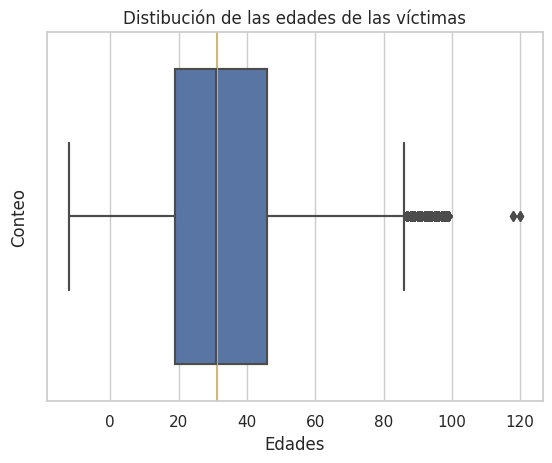

In [ ]:
#Realizamos un boxplot para poder tener una mejor visualización de los datos atipicos, como se puede observar
#un valor atípico seria el 120, esto podría ser un error en el reporte, habría que ver
#las circunstancias para poder decifrar la validez de este dato. También, podemos observar una media de 30 años de edad.
sns.set(style="whitegrid")
sns.boxplot(x=crimenes_reportados["age"])
plt.axvline(crimenes_reportados["age"].mean(), c='y')
ax = sns.boxplot(x=crimenes_reportados["age"])
ax.set(title="Distibución de las edades de las víctimas", xlabel= "Edades", ylabel= "Conteo")

##FALTA AGREGAR CURTOSIS Y ESO

Se puede observar que las edades de las victimas se concentran entre el rango entre el percentil 25 y el percentil 72, es decir entre los 19 y 46 años de edad, con una mediana de 31. También se puede observar valores atípicos como la edad 120.




In [ ]:
#Para nuestro análisis, no tomaremos en cuenta el 120.
crimenes_reportados = crimenes_reportados[crimenes_reportados['age'] < 120 ]

[Text(0.5, 1.0, 'Distibución de las edades de las víctimas'),
 Text(0.5, 0, 'Edades'),
 Text(0, 0.5, 'Conteo')]

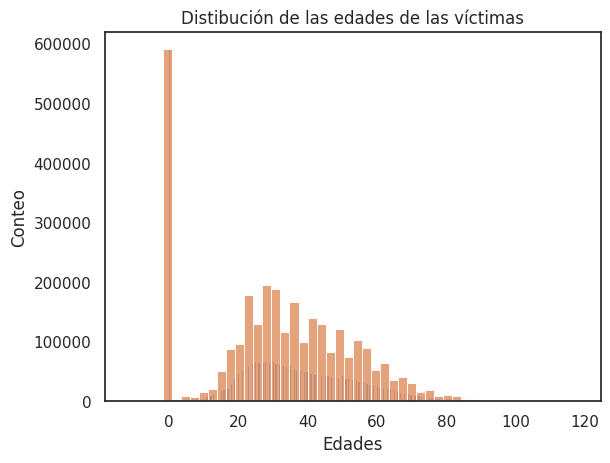

In [ ]:
#Con el histograma, pudimos observar de manera más obvia el la cantidad de reportes en donde la edad parece ser 0
#podría ser un error en la limpieza de los datos.
sns.set(style="white")
sns.histplot(crimenes_reportados['age'])
ax = sns.histplot(x=crimenes_reportados["age"], bins=50)
ax.set(title="Distibución de las edades de las víctimas", xlabel= "Edades", ylabel= "Conteo")

In [ ]:
#para fines de nuestro análisis, no tomaremos en cuenta los valores "0" ya que son un valor atípico
#que no tiene mucho sentido en nuestro contexto.
crimenes_reportados = crimenes_reportados[crimenes_reportados['age'] > 0 ]
print(f'Curtosis: {kurtosis(crimenes_reportados["age"])}')
print(f'Asimetría: {skew(crimenes_reportados["age"])}')

Curtosis: -0.04583502711596932
Asimetría: 0.5584633178721149


El resultado de la curtosis es negativo, esto quiere decir que tiene colas más ligeras y un pico más suave en comparación con la distribución normal. Esto indica que los valores de los datos están menos concentrados alrededor de la media y hay más valores atípicos, en nuestro caso, esto puede ser influenciado por el valor 120 y los valores 0, ya que la mayor parte de nuestros datos como se puede observar, estan concentrados cerca de la media.

Por otra parte, tenemos una asimetria positiva, indicando que la cola de nuestros datos esta hacia la derecha.

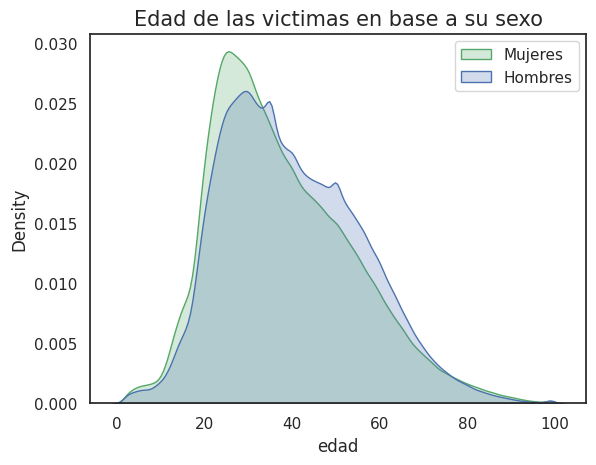

In [ ]:
##Al no tomar en cuenta los datos atípicos, obtenemos una gráfica de densidad donde se puede observar de mejor manera
por_sexo = crimenes_reportados.groupby(level=0)[['age']].mean()
gender = crimenes_reportados.groupby(level=0)[['sex']].last()
merged = por_sexo.merge(gender, left_index=True, right_index=True)
hombres = por_sexo[merged['sex'] == 'M']
mujeres = por_sexo[merged['sex'] == 'F']

ax = sns.kdeplot(mujeres['age'], label="Mujeres", fill=True, color="g")
sns.kdeplot(hombres['age'], label="Hombres", ax=ax, fill=True)
ax.set_title("Edad de las victimas en base a su sexo", size=15)
ax.set(xlabel="edad")
ax.legend(loc="upper right")

Ya que eliminamos nuestros valores atípicos, obtenemos una grafica de densidad donde podemos observar que hay más incidencias en reportes por parte de mujeres jovenes.

## Sección 4: Exploración de Variables Categóricas y Análisis Multivariable

[Text(0.5, 1.0, 'Distibución de las edades de las víctimas'),
 Text(0.5, 0, 'edad'),
 Text(0, 0.5, 'conteo')]

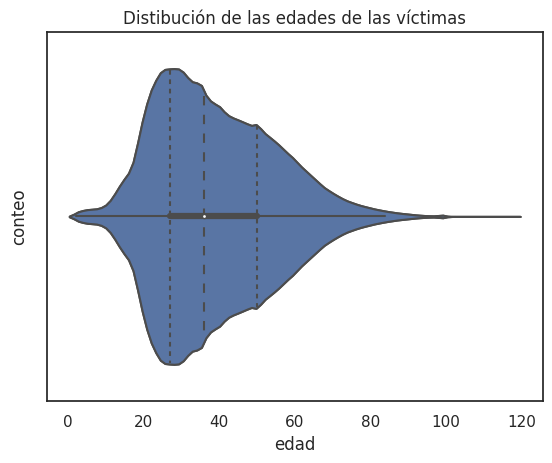

In [ ]:
sns.violinplot(x=crimenes_reportados["age"], inner="quart")
ax = sns.violinplot(x=crimenes_reportados["age"])
ax.set(title="Distibución de las edades de las víctimas", xlabel= "edad", ylabel= "conteo")

Aqui se puede observar de mejor manera la concentración de edades en los reportes, estas serían entre 30-40. Sin embargo, no se tiene una buena visualización de datos atípicos.


In [ ]:
#Como queremos hacer una comparativa del total de reportes por año, separamos la fecha en tres columnas diferentes
#una de día, otra de mes y por ultimo, una de año.
crimenes_reportados['date occured'].str.split('/')

DR_NO
1307355      [02, 20, 2010]
90631215     [01, 05, 2010]
100100501    [01, 02, 2010]
100100506    [01, 04, 2010]
100100508    [01, 07, 2010]
                  ...      
231606525    [03, 22, 2023]
231210064    [04, 12, 2023]
230115220    [07, 01, 2023]
230906458    [03, 05, 2023]
230319786    [11, 09, 2023]
Name: date occured, Length: 2402488, dtype: object

In [ ]:
fecha_ocurrida_2 = crimenes_reportados['date occured'].str.split('/', expand=True)
fecha_ocurrida_2.head()

,0,1,2
DR_NO,,,
1307355,02,20,2010
90631215,01,05,2010
100100501,01,02,2010
100100506,01,04,2010
100100508,01,07,2010


In [ ]:
#como tenían tipo de dato object, lo cambiamos a int para poder manipular los datos.
fecha_ocurrida_2.columns = ['mes', 'día', 'año']
fecha_ocurrida_2['año']= fecha_ocurrida_2['año'].astype(int)
fecha_ocurrida_2['día']= fecha_ocurrida_2['día'].astype(int)
fecha_ocurrida_2['mes']= fecha_ocurrida_2['mes'].astype(int)

In [ ]:
fecha_ocurrida_2.dtypes

mes    int64
día    int64
año    int64
dtype: object

In [ ]:
#agrupamos por año para sacar el total de reportes al año
años = fecha_ocurrida_2.groupby(['año']).count()
años = años.reset_index()
años = años.rename(columns = {'año' : 'date_year', 'mes' : 'total_delitos'})
años = años.drop(columns= "día")

años

,date_year,total_delitos
0,2010,173721
1,2011,168373
2,2012,169083
3,2013,161773
4,2014,124455
5,2015,179400
6,2016,183887
7,2017,187134
8,2018,186938
9,2019,177014


Text(0.5, 1.0, 'Total de reportes por año')

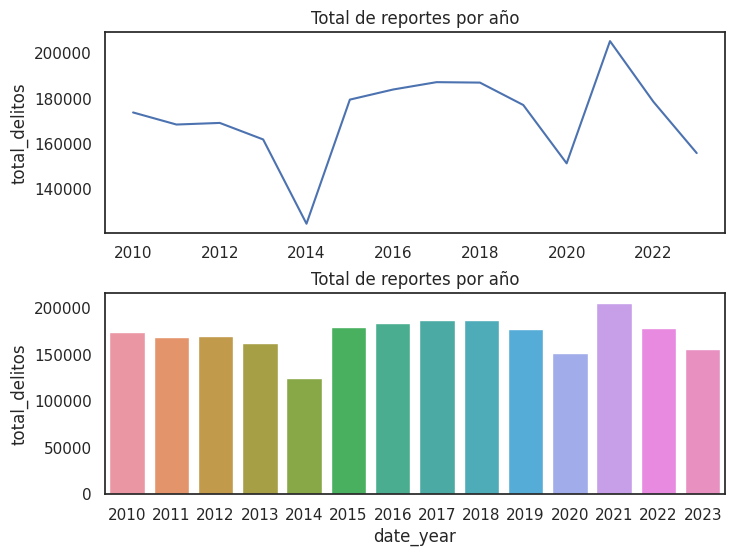

In [ ]:
import warnings
warnings.filterwarnings("ignore")

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8, 6))

sns.lineplot(data = años, x= 'date_year', y='total_delitos', ax= ax1)
sns.barplot(data = años, x= 'date_year', y='total_delitos', ax= ax2)
ax1.set_xlabel("")

fig.subplots_adjust(hspace = 0.3)

ax1.set_title("Total de reportes por año")
ax2.set_title("Total de reportes por año")

Como se puede observar, el año en el que menos se reportaron incidencias fue el 2014, concoren un reporte por el gobierno de california

## Sección 5: Correlaciones y Regresión Linear Simple


In [ ]:

crimenes_reportados.dtypes

date occured     object
time              int64
area code        object
area             object
district          int64
description      object
mocodes          object
age               int64
sex              object
race             object
context          object
weapon           object
case status      object
ccd1             object
location         object
street           object
latitude        float64
longitud        float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# Hacer una copia del dataframe antes de realizar la transformación
# Está copia se utiliza para el treemap que necesita la columna description
df_crimenes_la = crimenes_reportados.copy()

In [ ]:
# prompt: Mediante el marco de datos df_crimenes_2: transformar los datos de la columna "description" a un valor numeríco

# prompt: Mediante el marco de datos df_crimenes_2: transformar los datos de la columna "description" a un valor numeríco

crimenes_reportados['description'] = crimenes_reportados['description'].fillna('None')
crimenes_reportados['description'] = crimenes_reportados['description'].map(lambda x: len(x))


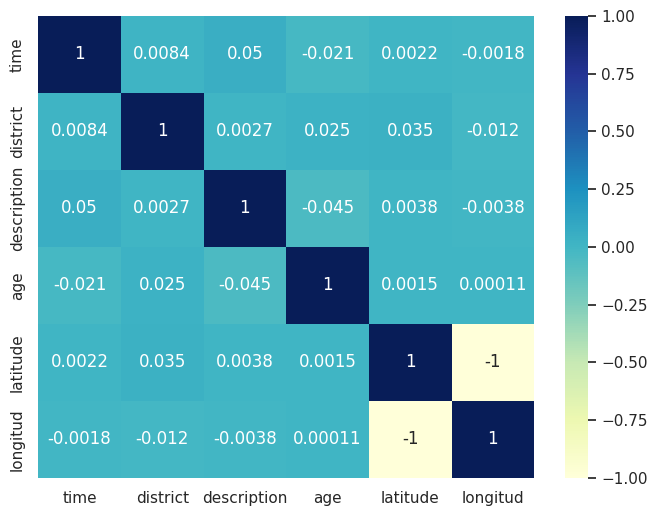

In [ ]:
#Heatmap de cada variable y elegir aquella que te permita tener un valor de R adecuado
plt.figure(figsize=(8,6))
ax = sns.heatmap(crimenes_reportados.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

## Sección 6: Distribuciones Muestrales y Técnicas de Evaluación de Modelos


### Histograma

Como en todo conjunto de datos (datasets), es común encontrar sesgos. Estos sesgos se refieren a muestras que podrían no representar completamente la población y cuando esto sucede, se considera que el conjunto de datos está sesgado. Evitar por completo estos sesgos puede resultar difícil, ya que a menudo es imposible obtener una muestra que refleje perfectamente a toda la población, pero a pesar de la presencia inevitable de sesgos, es importante reconocer su existencia y tenerlo en cuenta al analizar los datos.

Esto es algo que pudimos observar en nuestro conjunto de datos al analizar la cantidad de tipos de armas utilizadas para cometer el crimen. Es por ello que en las celdas siguientes aplicamos el muestreo aleatorio (aleatorizado).

Se lleva a cabo un análisis basado en la cantidad de tipos de armas registradas en el dataset, estas armas corresponden a las empleadas por el criminal. En este caso, utilizamos el muestreo aleatorio con reposición de elementos para seleccionar muestras con la misma probabilidad de ser elegidas y así evitar el sesgo.

Para realizar el remuestreo con reposición, se emplea la técnica de bootstrapping."

In [ ]:
# La columna weapon contiene el tipo de arma que se utilizo en el crimen registrado
col_arma_usada = crimenes_reportados['weapon']

# Visualizar los datos de la variable weapon
print(col_arma_usada)

DR_NO
1307355                                                  NA
90631215                                           HAND GUN
100100501    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
100100506                                                NA
100100508                                                NA
                                  ...                      
231606525    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
231210064                       UNKNOWN WEAPON/OTHER WEAPON
230115220                                                NA
230906458                                                NA
230319786                                                NA
Name: weapon, Length: 2402488, dtype: object


In [ ]:
# Los diferentes tipos de armas registradas son las siguientes
col_arma_usada.unique()

array(['NA', 'HAND GUN', 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN WEAPON/OTHER WEAPON', 'VERBAL THREAT', 'SIMULATED GUN',
       'FOLDING KNIFE', 'OTHER KNIFE', 'MACE/PEPPER SPRAY', 'STICK',
       'UNKNOWN FIREARM', 'SWITCH BLADE',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'BOARD', 'BLUNT INSTRUMENT',
       'SEMI-AUTOMATIC PISTOL', 'VEHICLE', 'OTHER CUTTING INSTRUMENT',
       'SCISSORS', 'BOTTLE', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
       'AUTOMATIC WEAPON/SUB-MACHINE GUN', 'CLUB/BAT', 'BRASS KNUCKLES',
       'KITCHEN KNIFE', 'BELT FLAILING INSTRUMENT/CHAIN',
       'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'SCREWDRIVER', 'FIRE',
       'STUN GUN', 'RIFLE', 'RAZOR BLADE', 'DIRK/DAGGER',
       'CAUSTIC CHEMICAL/POISON', 'SHOTGUN', 'ICE PICK',
       'ROCK/THROWN OBJECT', 'REVOLVER', 'OTHER FIREARM', 'BOWIE KNIFE',
       'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE', 'SCALDING LIQUID',
       'BOMB THREAT', 'MACHETE', 'TOY GUN',
       'UZI SEMIAUTOMA

Queremos determinar si los datos sobre el tipo de armas utilizadas por los criminales presentan algún sesgo o si son representativos para comprender patrones en el empleo de armas delictivas. También buscamos evaluar la incertidumbre en la estimación de la media. Para lograrlo, aplicamos el método de bootstrap, calculando la media en cada una de las muestras obtenidas.

In [ ]:
#Creamos una lista vacía para almacenar las medias
means = []

for i in range(10_000):
  sample = col_arma_usada.sample(n=10_000, replace=True)
  # Al obtener la muestra (sample) se realiza un conteo de cada tipo de arma en la muestra
  # Es así como pasamos de tener string a números
  sample = sample.value_counts()
  # Calculamos la media de las muestras de la cantidad de cada tipo de armas en la muestra
  means.append(sample.mean())

arma_usada_means = pd.Series(means)

El bootstrapping aplicado nos permite conocer la distribución muestral.

Como se observa, pareciera que existe un sesgo positivo o hacia la derecha. Esto podría significar que los datos sobre el tipo de arma empleada para cometer un crimen en Los Ángeles están un poco sesgados o puede ser un efecto del remuestreo. Otro factor que podría estar relacionado es que los criminales utilizan más cierto tipo de armas.

Text(0.5, 0, 'Medias del tipo de arma utilizada en el crimen')

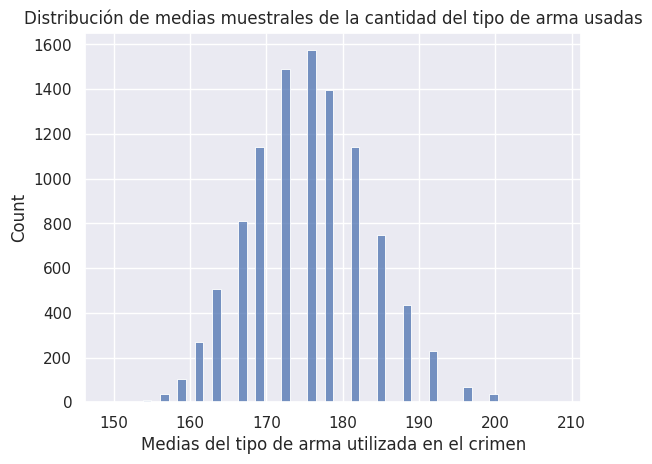

In [ ]:
#Histograma del arma más usada
# Este proceso permite observar la distribución de las medias muestrales
sns.set_style('darkgrid')
sns.histplot(arma_usada_means).set_title("Distribución de medias muestrales de la cantidad del tipo de arma usadas")
plt.xlabel("Medias del tipo de arma utilizada en el crimen")

De acuerdo a la curtosis obtenida, que mide el grado de achatamiento de la distribución en comparación con la distribución normal, podemos observar que tenemos cierta variabilidad en nuestros datos.

Por otro lado, el valor de la simetría obtenido, podemos determinar que hay más asimetría hacia la derecha en la distribución, siendo un tanto asimétrica debido a que es > 0.

In [ ]:
arma_usada_means.kurtosis()

-0.007563116253420876

In [ ]:
arma_usada_means.skew()

0.23075108115825657

Ahora se calcula el error estándar para conocer la incertidumbre existente.

El siguiente resultado se puede interpretar como que mientras menor sea el error, menor será la variabilidad.

Por lo tanto, se determinó que la variable 'weapon' puede considerarse significativa para realizar un análisis más profundo, lo que permitirá comprender los patrones delictivos y las medidas que se pueden aplicar para prevenir dichos crímenes.

In [ ]:
# Error estándar
arma_usada_means.std()

7.841009151670486

In [ ]:
print(f"Min: {arma_usada_means.min()}")
print(f"Max: {arma_usada_means.max()}")
print(f"Rango: {arma_usada_means.max() - arma_usada_means.min()}")

Min: 149.2537313432836
Max: 208.33333333333334
Rango: 59.07960199004975


Se obtiene un intervalo de confianza para resumir el nivel de confianza.

Tenemos un 95% de seguridad de que al tomar una muestra de la población original y obtenemos la medida estadística, la medida va caer dentro de este rango, con tendencia hacia la mitad del rango.

In [ ]:
# Intervalo de confianza del 95%
lim_inferior = arma_usada_means.quantile(0.025)
lim_superior = arma_usada_means.quantile(0.975)

In [ ]:
print(f"Intervalo de confianza del 95%: {lim_inferior} < {crimenes_reportados['weapon'][:10_000].value_counts().mean()} > {lim_superior}")

Intervalo de confianza del 95%: 161.29032258064515 < 188.67924528301887 > 192.30769230769232


### Regresión Lineal Múltiple
Se realiza un modelo de regresión lineal múltiple como modelo de predicción para predecir la edad de las víctimas en base al distrito y el tiempo del delito que fue cometido.

In [ ]:
# Asignar variables X(independiente)  e y (dependiente)
X= crimenes_reportados[['district','time']]

y = pd.DataFrame(crimenes_reportados['age'])


In [ ]:
# Visualizar las variables independientes X
X.head()

,district,time
DR_NO,,
1307355,1385,1350
90631215,646,150
100100501,176,2100
100100506,162,1650
100100508,182,2005


In [ ]:
# Visualizar las variables dependientes y
y.head()

,age
DR_NO,
1307355,48
90631215,47
100100501,47
100100506,23
100100508,46


Si observamos las siguientes gráficas podemos identificar la distribución de los puntos de datos.

Al observar a simple vista parece que estos no cuentan con una relación lineal, por lo que se prosigue con la elaboración del modelo para observar el resultado que se obtiene al emplear los datos.

Text(0.5, 1.0, 'Relación entre el distrito del crimen registrado y la edad de la víctima')

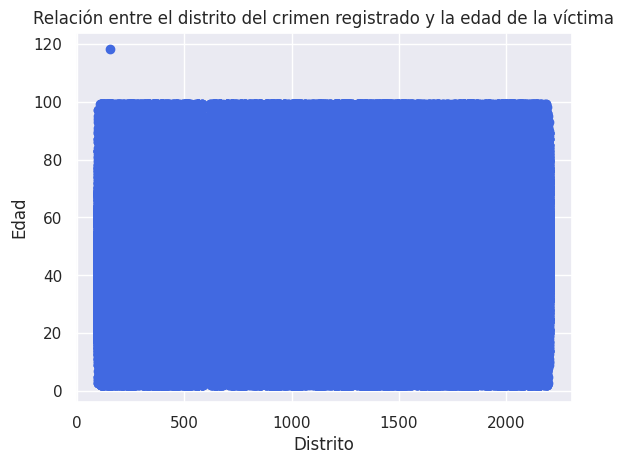

In [ ]:
# Observar los datos en relación al distrito y la variable edad
plt.scatter(X['district'], y, c = 'royalblue')
plt.xlabel("Distrito")
plt.ylabel("Edad")
plt.title("Relación entre el distrito del crimen registrado y la edad de la víctima")

Text(0.5, 1.0, 'Relación entre el tiempo y la edad de la víctima')

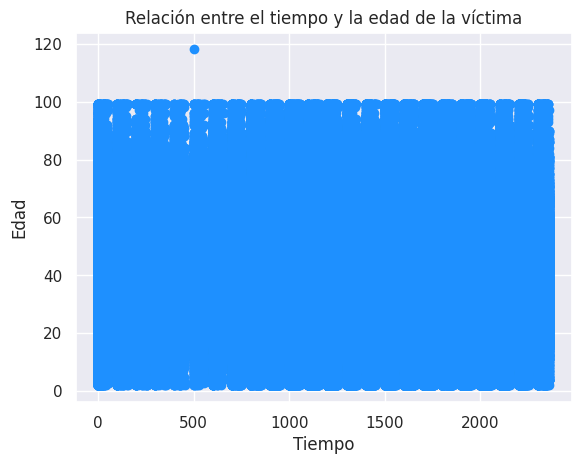

In [ ]:
# # Observar los datos en relación al tiempo y la variable edad
plt.scatter(X['time'], y, c = 'dodgerblue')
plt.xlabel("Tiempo")
plt.ylabel("Edad")
plt.title("Relación entre el tiempo y la edad de la víctima")

Se realiza la división del conjunto de datos en conjunto de entrenamiento y conjunto de prueba.

Al conjunto de entrenamiento le corresponden el 70% de los datos y al conjunto de prueba le corresponde el 30% de los datos.

In [ ]:
# Dividir los datos en conjunto de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
# Comenzamos con el entrenamiento del modelo de regresión lineal múltiple
# Se crea el modelo
reg_lr_multiple = LinearRegression().fit(X_train,y_train)

In [ ]:
# Se realiza la predicción empleando el conjunto de datos de prueba
y_pred = reg_lr_multiple.predict(X_test)

In [ ]:
# Observamos lo obtenido en la predicción
y_pred = y_pred[:,0]
y_pred

array([38.08779413, 39.50220361, 38.86297499, ..., 38.75992861,
       38.84846917, 38.91757791])

Como podemos observar en la siguiente celda el score del modelo no es realmente bueno, por lo que el modelo de regresión lineal múltiple no tuvo un buen desempeño y tiene una tendencia a realizar predicciones incorrectas debido a los patrones de los datos, por lo que el modelo no puede ajustarse correctamente a los datos.

In [ ]:
# Observamos el score obtenido por el modelo
reg_lr_multiple.score(X_test, y_test)

0.0011260066205994734

A partir de las siguientes celdas se aplica la validación cruzada para poder saber cuál es el máximo score que podemos obtener en nuestro modelo con la mejor partición del dataset.

In [ ]:
# Se realiza la validación cruzada
scores = cross_validate(reg_lr_multiple, X, y, scoring='r2')

In [ ]:
# Observamos los scores obtenidos
scores

{'fit_time': array([0.40274262, 0.35280919, 0.41904569, 0.49163127, 0.5028038 ]),
 'score_time': array([0.04243279, 0.02406025, 0.05199337, 0.05301499, 0.05939293]),
 'test_score': array([-0.01243817,  0.00068741,  0.00081024, -0.00114432, -0.00206415])}

Al aplicar la validación cruzada obtenemos una medida que nos permite conocer el mejor desempeño que se obtiene del modelo y que en consecuencia resulta más confiable.

In [ ]:
print(f"Score del modelo: {scores['test_score'].mean()}")

Score del modelo: -0.002829797975572146


Al análizar la celda anterior y a los scores obtenidos gracias a la validación cruzada aplicada podemos observar que al utilizar el modelo de regresión lineal en este caso para emplear de igual manera multiple variables (regresión lineal múltiple) podemos suponer que el modelo aplicado a los datos no captura adecuadamente la relación entre las variables para realizar una predicción adecuada y puede requerir ajustes en cuanto a la selección de características (variables) o la consideración de explorar otros modelos ya que la relación entre las variables podría ser no lineal.

A continuación se visualiza mediante un gráfico el resultado obtenido al aplicar el modelo de regresión lineal, específicamente el modelo de regresión lineal múltiple.

In [ ]:
plt.rcParams['agg.path.chunksize'] = 200
fig, ax = plt.subplots()

# Graficar los datos de entrenamiento y prueba
ax.scatter(X_train['district'], y_train, color='m', label='Datos de entrenamiento')
ax.scatter(X_test['district'], y_test, color='royalblue', label='Datos de prueba')

# Graficar la recta de regresión obtenida por el modelo
ax.plot(X_test['district'], y_pred, color='black',label='Regresión')

#Etiquetas de los ejes 'x' y 'y'
ax.set_xlabel('Distrito')
ax.set_ylabel('Edad')

# Título
ax.set_title('Regresión Lineal Múltiple en Base a la Edad de las Víctimas')
#Leyenda
ax.legend()
plt.show()

OverflowError: ignored

<Figure size 640x480 with 1 Axes>

In [ ]:
plt.rcParams['agg.path.chunksize'] = 200
fig, ax = plt.subplots()

# Graficar los datos de entrenamiento y prueba
ax.scatter(X_train['time'], y_train, color='m', label='Datos de entrenamiento')
ax.scatter(X_test['time'], y_test, color='royalblue', label='Datos de prueba')

# Graficar la recta de regresión obtenida por el modelo
ax.plot(X_test['time'], y_pred, color='black',label='Regresión')

#Etiquetas de los ejes 'x' y 'y'
ax.set_xlabel('Tiempo')
ax.set_ylabel('Edad')

# Título
ax.set_title('Regresión Lineal Múltiple en Base a la Edad de las Víctimas')
#Leyenda
ax.legend()
plt.show()

In [ ]:
# Gráfico 3d para observar las variables
fig=plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.scatter(X_train['district'],X_train['time'],y_train)
ax1.scatter(X_test['district'],X_test['time'], y_test)
ax1.plot(X_test['district'],X_test['time'], y_pred, c='black')

plt.show

De acuerdo a nuestros resultados, emplear un modelo de regresión lineal no sería lo más óptimo en este momento. Para nuestro dataset, no obtuvimos el resultado deseado que era predecir la edad de las víctimas de crímenes basándonos en las variables de distrito y tiempo.

## Sección 7: Visualización de Datos Avanzada

Se crea un treemap para visualizar datos jerárquicos, es decir, para presentar nuestros datos de manera organizada por niveles.

El treemap organizado nos permite observar la relación entre el género de las víctimas, el área donde se registró el crimen y la descripción del delito cometido.

In [ ]:
# Realizamos una copia del dataframe original (crimenes registrados en Los Ángeles) para poder emplear
df_crimenes_la = df_crimenes_la.copy()

In [ ]:
# Creamos una columna count que permite realizar el conteo para el treemap
df_crimenes_la['count'] = 1

En este treemap, el nivel superior corresponde al área en la que fue registrado el crimen. El siguiente nivel corresponde a la descripción del crimen cometido, y el nivel inferior corresponde al sexo o género de las víctimas del crimen.

De acuerdo a la página de la fuente de los datos, cada variable contiene lo siguiente:

* area: Las 21 áreas geográficas o divisiones de patrulla, reciben la designación del nombre que hace referencia a la comunidad circundante de la que es responsable.
* description: Descripción del crimen cometido.
* sex: Contiene el sexo o género de las víctimas. F - Female, M - Male, X - Unknown, NA - Son los datos no registrados.

Gracias al treemap, podemos identificar el área donde se han realizado más registros de crímenes, el cual sería en el area "77th Street" de Los Ángeles, el tipo de crimen más registrado, que es 'Batery - Simple Assault', y el sexo de las víctimas que más sufrieron ese tipo de crimen, Female (sexo femenino).

In [ ]:
# Treemap
fig = px.treemap(df_crimenes_la, path=['area', 'description', 'sex'], values='count')

#Configuración
#fig.update_traces(marker=dict(cornerradius=5)) # Para redondear las esquinas
fig.update_traces(root_color="lightgrey")
fig.show()

### Gráfico de barra apiladas



In [ ]:
# Observamos los valores unicos en la columna sex
crimenes_reportados['sex'].unique()

Se realiza un análisis con el objetivo de visualizar mediante una gráfica de barras apiladas la cantidad de víctimas del crimen según el sexo y el estatus de los casos registrados en los que fueron víctimas.

Para ello, nos enfocamos en los sexos F (Female) y M (Male).

In [ ]:
# Realizamos un filtro en el datraframe para quedarnos con filas donde el valor en la columna 'sex' sea M o F
df_crimenes_sex = crimenes_reportados[crimenes_reportados['sex'].isin(['M', 'F'])]

# Se visualiza el dataframe resultante
df_crimenes_sex.head()

In [ ]:
# Observamos la cantidad de casos por estatus de los mismos
df_crimenes_sex['case status'].value_counts()

Como se observa en la celda anterior, existen valores que son pequeños en comparación con los valores más grandes. Por ello, se realiza un filtrado de los datos para poder observar los tipos de casos en dos partes.

Primero se visualizan los datos correspondientes a la cantidad de casos por el estatus de cada caso mediante una gráfica de barras simple.

In [ ]:
# Gráfica de barras
# Filtro para observar los tres primeros tipos de estatus de los casos
filtro_status_1 = df_crimenes_sex[df_crimenes_sex['case status'].isin(['Invest Cont', 'Adult Arrest', 'Adult Other'])]

sns.set_style('darkgrid')
sns.barplot(x = filtro_status_1['case status'].value_counts(), y = filtro_status_1['case status'].unique(), palette = 'Set2', linewidth = 2).set_title("Cantidad de casos por estatus de los casos")

In [ ]:
# Filtro para observar el estatus de los casos que contiene una cantidad pequeña de casos en dicho estatus
# Se quiere observar todos los estatus por lo que no se eliminan y se gráfican aparte
filtro_status_2 = df_crimenes_sex[df_crimenes_sex['case status'].isin(['Juv Arrest', 'Juv Other'])]

sns.set_style('darkgrid')
sns.barplot(x = filtro_status_2['case status'].value_counts(), y = filtro_status_2['case status'].unique(),palette = 'Set2', linewidth = 2).set_title("Cantidad de casos por estatus de los casos")

Ahora se presenta una gráfica de barras apiladas para visualizar la cantidad de víctimas del crimen por sexo y el estatus de los casos registrados en los que fueron víctimas.

En la gráfica, se destaca que el estatus con más registros es 'invest cont', que indica que la investigación del crimen sigue en curso. Esto parece ser predominante en los casos de víctimas del sexo masculino.

In [ ]:
# Calcular el conteo de casos por estatus de los casos y sexo de las víctimas
conteo = filtro_status_1.groupby(['case status', 'sex']).size().unstack()

# Gráfica de barras apiladas
conteo.plot(kind = 'barh', stacked = True, color=['dodgerblue', 'royalblue'])

# Configuración de la gráfica
plt.title("Cantidad de casos por el estatus de los casos y el sexo de las víctimas")
plt.ylabel("Estatus de los casos de crímenes")
plt.xlabel("Cantidad de casos")
plt.legend(title = "Sexo de la víctima")
plt.show()

En la siguiente gráfica podemos observar que el estatus con un mayor número de casos es el de 'Juv arrest', el cual hace referencia a que en esos casos se realizó un arresto juvenil, dando a entender que los criminales eran jóvenes. En cuanto al sexo de las víctimas con casos de dicho estatus, se observa que la mayoría de las víctimas eran del sexo masculino.

In [ ]:
# Calcular el conteo de casos por tipo y sexo

conteo = filtro_status_2.groupby(['case status', 'sex']).size().unstack()
# Graficar la gráfica de barras apiladas
conteo.plot(kind = 'barh', stacked = True, color = ['dodgerblue', 'royalblue'])

# Configuración de la gráfica
plt.title("Cantidad de casos por el estatus de los casos y el sexo de las víctimas")
plt.ylabel("Estatus de los casos de crímenes")
plt.xlabel("Cantidad de casos")
plt.legend(title = "Sexo de la víctima")
plt.show()

Ahora, se realiza un análisis para poder visualizar mediante la gráfica de barras apiladas la frecuencia del tipo de arma empleada para cometer los crímenes registrados visualizando la división por género de las víctimas que fueron atacadas por el tipo de arma (las 5 armas más empleadas). Esto es con el objetivo de observar como es que cada género (masculino o femenino) influye.

Lo que se quiere observar es de acuerdo a los 5 tipos de armas más empleadas.


In [ ]:
# Observamos la cantidad por tipo de arma utilizada en el crimen
df_crimenes_sex['weapon'].value_counts()

In [ ]:
# Seleccionar las 5 armas más empleadas en los crímenes
# Filtro para seleccionar las 5 armas
filtro_status_1 = df_crimenes_sex[df_crimenes_sex['weapon'].isin(['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
                                                                       'VERBAL THREAT',
                                                                       'UNKNOWN WEAPON/OTHER WEAPON',
                                                                       'HAND GUN',
                                                                       'KNIFE WITH BLADE 6INCHES OR LESS'])]


Como resultado obtenemos la siguiente gráfica. De acuerdo a lo registrado al parecer el genero o sexo de las víctimas tiene una participación en el tipo de armas más utilizadas, en los casos en donde se suele emplear el tipo de arma "strong-arm" y "verbal threat" se registraron más casos en donde las mujeres eran las víctimas, mientras que en crimenes en donde se utilizaron los tipos de armas "unknow weapon/ other weapon", "knif with blade 6inches or less" y "Hand gun" fueron los hombres quienes sufrieron más casos en donde se utilizaron dichas armas.

In [ ]:
# Calcular el conteo de casos por el tipo de arma utilizada y el sexo de las víctimas
conteo = filtro_status_1.groupby(['weapon', 'sex']).size().unstack()

# Gráfica de barras apiladas
conteo.plot(kind = 'barh', stacked = True, color=['darkorange', 'firebrick'])

# Configuración de la gráfica
plt.title("Cantidad de crimenes por el tipo de arma y el sexo de las víctimas")
plt.xlabel("Cantidad de casos de crímenes")
plt.ylabel("Tipo de arma")
plt.legend(title = "Sexo de la víctima")
plt.show()

## Sección 8: Pruebas A/B y Procesamiento de Lenguaje Natural

In [ ]:
ubicacion_crimenes = crimenes_reportados


In [ ]:
ubicacion_crimenes =ubicacion_crimenes.drop(columns=['date occured', 'time', 'area code', 'area', 'district', 'description', 'mocodes', 'age', 'sex', 'race', 'context', 'weapon', 'case status', 'ccd1', 'location', 'street'])
#solo me interesan las columnas de latitud y longitud

In [ ]:
ubicacion_crimenes

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitude')
ax.set_ylabel('longitud')

sns.scatterplot(x=ubicacion_crimenes['latitude'], y=ubicacion_crimenes['longitud'], ax=ax)


ax.set_xlim([33, 35])
ax.set_ylim([-119, -117])

#tuve que modificar los límites ya que si usaba los de default, se veían muy amontonados los puntos

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans(n_clusters=6, max_iter=10000)

In [ ]:
k_means.fit(ubicacion_crimenes[['latitude', 'longitud']])

In [ ]:
centers = k_means.cluster_centers_

centers

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitude')
ax.set_ylabel('longitud')

ax.set_xlim([33, 35])
ax.set_ylim([-119, -117])

sns.scatterplot(x=ubicacion_crimenes['latitude'], y=ubicacion_crimenes['longitud'], ax=ax, palette='rainbow');
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, color='black');

In [ ]:
clasificaciones = k_means.predict(ubicacion_crimenes[['latitude', 'longitud']])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

ax.set_xlim([33, 35])
ax.set_ylim([-119, -117])

sns.scatterplot(ubicacion_crimenes['latitude'], ubicacion_crimenes['longitud'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

## Sección 9: Introducción a Machine Learning: Clasificación No Supervisada y Supervisada


In [ ]:
#Tengo que cambiar la columna de la fecha en que ocurrió a números y sólo el año para poder hacer el análisis de regresión lógica
crimenes_reportados_2 = crimenes_reportados
crimenes_reportados_2

In [ ]:
fechas_divididas = crimenes_reportados_2['date occured'].str.split("/")
crimenes_reportados_2['date occured'] = fechas_divididas.str.get(-1)
crimenes_reportados_2

In [ ]:
crimenes_reportados_2['date occured'] = crimenes_reportados_2['date occured'].astype(int)

In [ ]:
crimenes_reportados_2['weapon'].unique()

In [ ]:
#voy a usar la columa de weapon para hacer el análisis
#las celdas que tienen NA las voy a poner en 0, indicando que NO se utilizó un arma
#las celdas que si tienen un arma descrita llevarán un 1
crimenes_reportados_2['weapon'] = crimenes_reportados['weapon'].apply(lambda x: 1 if x != 'NA' else 0)
crimenes_reportados_2

In [ ]:
#elimino todas las columnas que no llevan datos numéricos
crimenes_reportados_2 = crimenes_reportados_2.drop(columns=['area code', 'area', 'description', 'sex', 'race', 'context', 'case status', 'ccd1', 'location', 'street'])

In [ ]:
crimenes_reportados_2

In [ ]:
#después estuvbe batallando con mocodes así que decidí borrarla también, aparte de que no considero importante la información para el análisis
crimenes_reportados_2 = crimenes_reportados_2.drop(columns=['mocodes'])

In [ ]:
crimenes_reportados_2 = crimenes_reportados_2.drop(columns=['time'])
#tampoco la hora

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
modelo_logistico = LogisticRegression()

In [ ]:
modelo_logistico.fit(X_train, y_train)

In [ ]:
y_pred = modelo_logistico.predict(X_test)

y_pred

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

In [ ]:
#Los valores obtenidos no he podido interpretarlos de la manera más óptima
#pero el valor de la exactitud es de 0.66, por ende se puede decir que no es tan bueno y que puede mejorar
#no comprendo por qué se obtuvo un valor de sensibilidad de 3.288